In [1]:
#https://docs.python.jp/3/tutorial/

# 2. Python インタプリタを使う

# 3. 形式ばらない Python の紹介

変数が "定義" されて (つまり値が代入されて) いない場合、その変数を使おうとするとエラーが発生します:

In [2]:
n

NameError: name 'n' is not defined

In [3]:
print("""\
Usage: thingy [OPTIONS]
     -h                        Display this usage message
     -H hostname               Hostname to connect to
""")


Usage: thingy [OPTIONS]
     -h                        Display this usage message
     -H hostname               Hostname to connect to



In [5]:
3 * 'un!' + 'ium'

'un!un!un!ium'

In [6]:
'Py' 'thon'

'Python'

これは 2 つのリテラルどうしに対してのみ働き、変数や式には働きません:

In [7]:
prefix = 'Py'
prefix 'thon'

SyntaxError: invalid syntax (<ipython-input-7-779914c62160>, line 2)

In [8]:
word = 'Python'
word[0]

'P'

大き過ぎるインデクスを使おうとするとエラーが発生します:

In [9]:
word[42]  # the word only has 6 characters

IndexError: string index out of range

しかし、スライスで範囲外のインデクスを使ったときは上手く対応して扱ってくれます:

In [10]:
word[4:42]

'on'

Python の文字列は変更できません – つまり不変 (immutable) なのです。従って、文字列のインデクスで指定したある場所に代入を行うとエラーが発生します:

In [11]:
word[0] = 'J'

TypeError: 'str' object does not support item assignment

# 4. その他の制御フローツール

ループ内部でイテレートしているシーケンスを修正する必要があれば (例えば選択されたアイテムを複製するために)、最初にコピーを作ることをお勧めします。シーケンスに対するイテレーションは暗黙にコピーを作りません。スライス記法はこれを特に便利にします:

for w in words: を使った場合は、この例は defenestrate を何度も繰り返し挿入することで、無限リストを作成しようとします。

In [14]:
words = ['cat', 'window', 'defenestrate']
for w in words[:]:  # Loop over a slice copy of the entire list.
    if len(w) > 6:
        words.insert(0, w)
words

['defenestrate', 'cat', 'window', 'defenestrate']

In [15]:
list(enumerate(words))

[(0, 'defenestrate'), (1, 'cat'), (2, 'window'), (3, 'defenestrate')]

In [17]:
for (index, val) in enumerate(words):
    print(val)

defenestrate
cat
window
defenestrate


pass 文は何もしません。 pass は、文を書くことが構文上要求されているが、プログラム上何の動作もする必要がない時に使われます:    
これは最小のクラスを作るときによく使われる方法です:

In [1]:
class MyEmptyClass:
    pass

重要な警告: デフォルト値は 1 度だけしか評価されません。デフォルト値がリストや辞書のような変更可能なオブジェクトの時にはその影響がでます。例えば以下の関数は、後に続く関数呼び出しで関数に渡されている引数を累積します:

In [2]:
def f(a, L=[]):
    L.append(a)
    return L

In [3]:
print(f(1))
print(f(2))
print(f(3))

[1]
[1, 2]
[1, 2, 3]


後続の関数呼び出しでデフォルト値を共有したくなければ、代わりに以下のように関数を書くことができます:

In [4]:
def f(a, L=None):
    if L is None:
        L = []
    L.append(a)
    return L

In [5]:
print(f(1))
print(f(2))
print(f(3))

[1]
[2]
[3]


# 8. エラーと例外

エラーには (少なくとも) 二つのはっきり異なる種類があります。それは 構文エラー (syntax error) と 例外 (exception) です。



8.1. 構文エラー

構文エラーは構文解析エラー (parsing error) としても知られており、Python を勉強している間に最もよく遭遇する問題の一つでしょう

In [12]:
while True print('Hello world')

SyntaxError: invalid syntax (<ipython-input-12-2b688bc740d7>, line 1)

パーサは違反の起きている行を表示し、小さな「矢印」を表示して、行中でエラーが検出された最初の位置を示します。エラーは矢印の 直前の トークンでひき起こされています (または、少なくともそこで検出されています)。上記の例では、エラーは関数 print() で検出されています。コロン (':') がその前に無いからです。入力がスクリプトから来ている場合は、どこを見ればよいか分かるようにファイル名と行番号が出力されます。



8.2. 例外

たとえ文や式が構文的に正しくても、実行しようとしたときにエラーが発生するかもしれません。実行中に検出されたエラーは 例外 (exception) と呼ばれ、常に致命的とは限りません。これから、Python プログラムで例外をどのように扱うかを学んでいきます。ほとんどの例外はプログラムで処理されず、以下に示されるようなメッセージになります:

In [13]:
10 * (1/0)

ZeroDivisionError: division by zero

In [14]:
4 + spam*3

NameError: name 'spam' is not defined

In [15]:
'2' + 2

TypeError: Can't convert 'int' object to str implicitly

エラーメッセージの最終行は何が起こったかを示しています。例外は様々な型 (type) で起こり、その型がエラーメッセージの一部として出力されます。上の例での型は ZeroDivisionError, NameError, TypeError です。例外型として出力される文字列は、発生した例外の組み込み名です。これは全ての組み込み例外について成り立ちますが、ユーザ定義の例外では (成り立つようにするのは有意義な慣習ですが) 必ずしも成り立ちません。標準例外の名前は組み込みの識別子です (予約語ではありません)。

残りの行は例外の詳細で、その例外の型と何が起きたかに依存します。

エラーメッセージの先頭部分では、例外が発生した実行コンテキスト (context) を、スタックのトレースバック (stack traceback) の形式で示しています。一般には、この部分にはソースコード行をリストしたトレースバックが表示されます。しかし、標準入力から読み取られたコードは表示されません。

8.3. 例外を処理する

例外を選別して処理するようなプログラムを書くことができます。以下の例を見てください。この例では、有効な文字列が入力されるまでユーザに入力を促しますが、ユーザがプログラムに (Control-C か、またはオペレーティングシステムがサポートしている何らかのキーを使って) 割り込みをかけてプログラムを中断させることができるようにしています。ユーザが生成した割り込みは、 KeyboardInterrupt 例外が送出されることで通知されるということに注意してください。


In [2]:
temp = 1
try:
    x = int(temp)
except ValueError:
    print("Oops!  That was no valid number.  Try again...")

In [7]:
temp = ""
try:
    x = int(temp)
except ValueError:
    print("Oops!  That was no valid number.  Try again...")

Oops!  That was no valid number.  Try again...


In [8]:
temp = ""
try:
    x = int(temp)
except ValueError as ex:
    print(ex)

invalid literal for int() with base 10: ''


In [9]:
temp = ""
try:
    x = int(temp)
except Exception as ex:
    print(ex)

invalid literal for int() with base 10: ''


In [4]:
class B(Exception):
    pass

class C(B):
    pass

class D(C):
    pass

In [5]:
for cls in [B, C, D]:
    try:
        raise cls()
    except D:
        print("D")
    except C:
        print("C")
    except B:
        print("B")

B
C
D


# 9. クラス

# 9.2.1. スコープと名前空間の例

異なるスコープと名前空間がどのように参照されるか、また global および nonlocal が変数の束縛にどう影響するか、この例で実演します:

In [10]:
def scope_test():
    def do_local():
        spam = "local spam"

    def do_nonlocal():
        nonlocal spam
        spam = "nonlocal spam"

    def do_global():
        global spam
        spam = "global spam"

    spam = "test spam"
    do_local()
    print("After local assignment:", spam)
    do_nonlocal()
    print("After nonlocal assignment:", spam)
    do_global()
    print("After global assignment:", spam)

In [11]:
scope_test()
print("In global scope:", spam)

After local assignment: test spam
After nonlocal assignment: nonlocal spam
After global assignment: nonlocal spam
In global scope: global spam


このとおり、(デフォルトの) ローカルな 代入は scope_test 上の spam への束縛を変更しませんでした。 nonlocal 代入は scope_test 上の spam への束縛を変更し、 global 代入はモジュールレベルの束縛を変更しました。

またここから、 global 代入の前には spam に何も束縛されていなかったことも分かります。

In [23]:
class ClassName1:
    i = 1
    def m1():
        return "m1"
    def m2():
        return "m2"

In [25]:
c = ClassName1
c.m1()

'm1'

In [20]:
class ClassName2:
    def __init__(self):
        self.data = []
    i = 1
    def m1(self):
        return "m1"
    def m2(self):
        return "m2"

In [21]:
c = ClassName2()

In [26]:
c.m1()

'm1'

In [29]:
class __metaclass__(type):
    __repr__ = lambda cls: cls.__name__

In [52]:
class ex_2:
    "Serious order disagreement" #From Guido
    class O: pass
    class X(O): pass
    class Y(O): pass
#     class A(X,Y): pass
#     class B(Y,X): pass

In [57]:
print(ex_2.O)
print(ex_2.X)
# print(ex_2.A)
a = ex_2.O
a()
print(ex_2.O.__bases__)

<class '__main__.ex_2.O'>
<class '__main__.ex_2.X'>
(<class 'object'>,)


# 29.7. abc — 抽象基底クラス

In [97]:
from abc import ABCMeta

class MyABC(metaclass=ABCMeta):
    pass

MyABC.register(tuple)

assert issubclass(tuple, MyABC)
assert isinstance((), MyABC)


@abc.abstractmethod：抽象メソッドを示すデコレータ

In [95]:
from abc import ABCMeta, abstractmethod
class AbsAnimal(metaclass=ABCMeta):
    @abstractmethod
    def eat():
        pass

tmp = AbsAnimal()

TypeError: Can't instantiate abstract class AbsAnimal with abstract methods eat

abstractmethodのクラスをそのまま使わないでねって

In [98]:
from abc import ABCMeta
class AbsAnimal(metaclass=ABCMeta):
    @abstractmethod
    def eat(self):
        pass

class Human(AbsAnimal):
    def eat(self):
        print('おいしい!')
class Dog(AbsAnimal):
    def eat(self):
        print('baw!baw!')

tmp = Human()
tmp.eat()

tmp = Dog()
tmp.eat()

おいしい!
baw!baw!


# ◆デザインパターン

In [ ]:
#http://doloopwhile.hatenablog.com/entry/20090627/1275175981

# ◆◆ 生成に関するパターン

# Abstract Factory パターン

関連するインスタンス群を生成するための API を集約することによって、複数のモジュール群の再利用を効率化する。抽象的な工場。

In [163]:
# from abc import ABCMeta
# class AbstractCreator(metaclass=ABCMeta):
#     def __init__(self):
#         self.name = ""
#     @abstractmethod
#     def createInstrument(self):
#         return Animal()


In [159]:
# from abc import ABCMeta
# class Animal(metaclass=ABCMeta):
#     def __init__(self):
#         self.voice = ""
#     def setVoice(self, voice):
#         self.voice = voice
#     def printVoice(self):
#         print(self.voice)
#     @abstractmethod
#     def play(self):
#         pass

# ◆◆振る舞いに関するパターン

# Template Method パターン

GOF定義の一つ。「振る舞いに関するパターン」。ある処理のおおまかなアルゴリズムをあらかじめ決めておいて、そのアルゴリズムの具体的な設計をサブクラスに任せることである。そのため、システムのフレームワークを構築するための手段としてよく活用される。    

AbstractClass:StringLister    
AbstractClass#templateMethod():StringLister#display()    
ConcreteClass:PlainTextStringLister,HtmlStringLister    

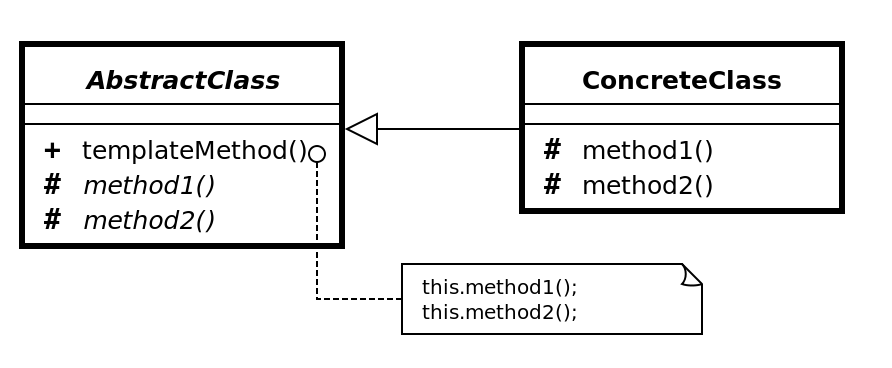

In [141]:
from abc import ABCMeta
class StringLister(metaclass=ABCMeta):
    def __init__(self):
        self.result = []
    @abstractmethod
    def formatHeader(self):
        pass
    @abstractmethod
    def formatItem(self, item):
        pass
    @abstractmethod
    def formatFooter(self):
        pass
    #処理をテンプレートで決めとく。
    def display(self, items):
        self.result.append(self.formatHeader())
        for item in items:
            self.result.append(item)
        return self.result

In [143]:
#抽象クラスを継承して値を入れてる。
class PlainTextStringLister(StringLister):
    def formatHeader(self):
        return ""
    def formatItem(self, item):
        return "-" + item + "¥r¥n"
    def formatFooter(self):
        return ""

In [137]:
class HtmlStringLister(StringLister):
    def formatHeader(self):
        return "&lt;ul>\r\n"
    def formatItem(self, item):
        return "  &lt;li>" + item + "&lt;/li>\r\n"
    def formatFooter(self):
        return "&lt;/ul>\r\n"

In [144]:
#色んなフォーマットにも対応できる。
items = ["First", "Second", "Third"]
pl = PlainTextStringLister()
pl.display(items)

['', 'First', 'Second', 'Third']

In [140]:
hl = HtmlStringLister()
hl.display(items)

['&lt;ul>\r\n', 'First', 'Second', 'Third']

# ◆Python 標準ライブラリ

# 26.4. unittest — ユニットテストフレームワーク

テストケースは、 unittest.TestCase のサブクラスとして作成します。メソッド名が test で始まる三つのメソッドがテストです。テストランナーはこの命名規約によってテストを行うメソッドを検索します。    
これらのテスト内では、予定の結果が得られていることを確かめるために assertEqual() を、条件のチェックに assertTrue() や assertFalse() を、例外が発生する事を確認するために assertRaises() をそれぞれ呼び出しています。 assert 文の代わりにこれらのメソッドを使用すると、テストランナーでテスト結果を集計してレポートを作成する事ができます。

In [9]:
import unittest

class TestStringMethods(unittest.TestCase):

    def test_upper(self):
        self.assertEqual('foo'.upper(), 'FOO')

    def test_isupper(self):
        self.assertTrue('FOO'.isupper())
        self.assertFalse('Foo'.isupper())

    def test_split(self):
        s = 'hello world'
        self.assertEqual(s.split(), ['hello', 'world'])
        # check that s.split fails when the separator is not a string
        with self.assertRaises(TypeError):
            s.split(2)

if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

...
----------------------------------------------------------------------
Ran 3 tests in 0.003s

OK


上の例が unittest モジュールで最もよく使われる機能で、ほとんどのテストではこれで十分です。以下では全ての機能を一から解説しています。

# 26.4.4. テストコードの構成

In [ ]:
import unittest

class DefaultWidgetSizeTestCase(unittest.TestCase):
    def test_default_widget_size(self):
        widget = Widget('The widget')
        self.assertEqual(widget.size(), (50, 50))

# xml

In [4]:
#https://www.lifewithpython.com/2013/06/ElementTree.html
import os
import xml.etree.ElementTree as ET

In [9]:
XMLFILE = "sample.xml"

tree = ET.parse(XMLFILE)  # ファイルから読み込み
root = tree.getroot()
print(root)
print(root.tag)
print(root.attrib)

<Element 'feed' at 0x106ea86d8>
feed
{'attrB': 'value B', 'attrA': 'value A'}


In [10]:
for e in root:
    print(e.tag)

title
categories
